In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
def normalize(vector: list):
    mag = math.sqrt(vector[0]**2 + vector[1]**2)
    return [vector[0] / mag, vector[1] / mag]

def generateOuterPoly(points: list, d: float):
    outerPnts = []

    for i in range(len(points)):
        thisPnt = points[i]
        prevPnt = points[i - 1]
        nextPnt = points[(i + 1) % len(points)]

        prevThis = [thisPnt[0] - prevPnt[0], thisPnt[1] - prevPnt[1]]
        thisNext = [nextPnt[0] - thisPnt[0], nextPnt[1] - thisPnt[1]]

        prevThis_normal_unit = normalize([-prevThis[1], prevThis[0]])
        thisNext_normal_unit = normalize([-thisNext[1], thisNext[0]])

        pointNormal_unit = normalize([prevThis_normal_unit[0] + thisNext_normal_unit[0], prevThis_normal_unit[1] + thisNext_normal_unit[1]])

        pointNormal_scaled = [pointNormal_unit[0] * d, pointNormal_unit[1] * d]

        movedPoint = [thisPnt[0] + pointNormal_scaled[0], thisPnt[1] + pointNormal_scaled[1]]
        outerPnts.append(movedPoint)

    return outerPnts

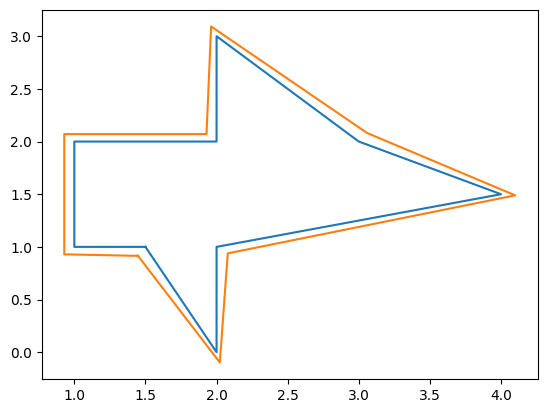

In [6]:
inX = [1.5, 1, 1, 2, 2, 3, 4
       , 2, 2]
inY = [1, 1, 2, 2, 3, 2, 1.5, 1, 0]
# inX = [1, 2, 3, 2]
# inY = [1, 3, 1, 2]
# inX = [0, 2, 4]
# inY = [0, 2, 0]

input = [(inX[i], inY[i]) for i in range(len(inX))]

newPnts = generateOuterPoly(input, 0.1)

outX = [pnt[0] for pnt in newPnts]
outY = [pnt[1] for pnt in newPnts]



## FOR DISPLYAING ONLY
inX.append(inX[0])
inY.append(inY[0])
outX.append(outX[0])
outY.append(outY[0])
## END FOR DISPLAYING



fig = plt.figure(dpi=100)
plt.plot(inX, inY)
plt.plot(outX, outY)